In [1]:
## What are we doing?
## This is where you explain..

## Imports
> Usually a good habit to put all your imports on top.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('ehamropasalmandu.csv')

In [4]:
df

,date,dailysales
0,2014-01-01,45026.679682
1,2014-01-02,44766.307139
2,2014-01-03,44808.809193
3,2014-01-04,29195.590640
4,2014-01-05,50443.655492
...,...,...
2286,2020-04-05,74053.890095
2287,2020-04-06,69654.072177
2288,2020-04-07,69197.305917
2289,2020-04-08,68841.445805


## Exploratory data analysis

How many rows and columns do we have?

List all the columns

Display the first 10 elements of the dataset

Display the last 15 elements of the dataset

Display some(more than one) random rows. 

What data type do the columns store?

Try .info() and .describe(). What do you observe?

What is the mean, and median sales for one day?

Change the column that stores date from string (object) to datetime

What is the min date?

What is the max date?

Are all the dates unique?

Are there missing values? Do you think real world data will have missing values?

What can you do if you have missing values in your datasets?

When did the most top 10 sales happen?

When did the least bottom 10 sales happen?

Are they weekends or weekdays?

If one of your intevestor were to ask, what month usually brings in the highest sales, what would you answer?

If one of your intevestor were to ask, what day of the week usually brings in the highest sales, what would you answer?

Plot the time series chart

Plot the time series chart with cummulative sum

Plot the time series charts with rolling averages (7 days, 30 days, 365 days)

Why are the initial values NaN when you apply rolling averages?

## Insights

What have you observed up until this point regarding eHamroPasalmandu.com?

1. Do you think the business has potential?
2. What do you observe in terms of weekly, monthly and yearly seasonality?
3. As a business how would you think about your fixed cost vs your operating cost?
4. Can you strategize something for days that you do not make as much money?
5. If the projected expenses (comparitively simple to calculate) for next year is Rs.20,000,000 is this a viable business?


## Forecasting

(from wikipedia)
A time series is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data. Examples of time series are heights of ocean tides, counts of sunspots, and the daily closing value of the Dow Jones Industrial Average.

Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values.

### Introduction to FB Prophet

https://facebook.github.io/prophet/

If you do not have prophet, uncomment the line below and run:
    

In [5]:
# !pip install fbprophet

In [6]:
from fbprophet import Prophet

Prophet needs your date to be renamed ds, and the value to be named (y)

rename date to ds and dailysales to y

In [7]:
df.rename({'date': 'ds', 'dailysales': 'y'}, axis=1, inplace=True)

In [8]:
df

,ds,y
0,2014-01-01,45026.679682
1,2014-01-02,44766.307139
2,2014-01-03,44808.809193
3,2014-01-04,29195.590640
4,2014-01-05,50443.655492
...,...,...
2286,2020-04-05,74053.890095
2287,2020-04-06,69654.072177
2288,2020-04-07,69197.305917
2289,2020-04-08,68841.445805


> Prophet utilizes a Bayesian based curve fitting method to forecast the time series data.

Introduce the model

In [9]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Fit the model

Predict one year in the future

In [10]:
future = m.make_future_dataframe(periods=365)

In [11]:
future.tail()

,ds
2651,2021-04-05
2652,2021-04-06
2653,2021-04-07
2654,2021-04-08
2655,2021-04-09


In [12]:
forecast = m.predict(future)

In [13]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2651,2021-04-05,72401.903933,68355.238512,76214.749695
2652,2021-04-06,71817.589018,67840.327759,75777.525691
2653,2021-04-07,71302.329859,67515.290865,75614.639692
2654,2021-04-08,70866.256877,66991.410271,74870.550380
2655,2021-04-09,71183.308950,67040.527983,75039.849008


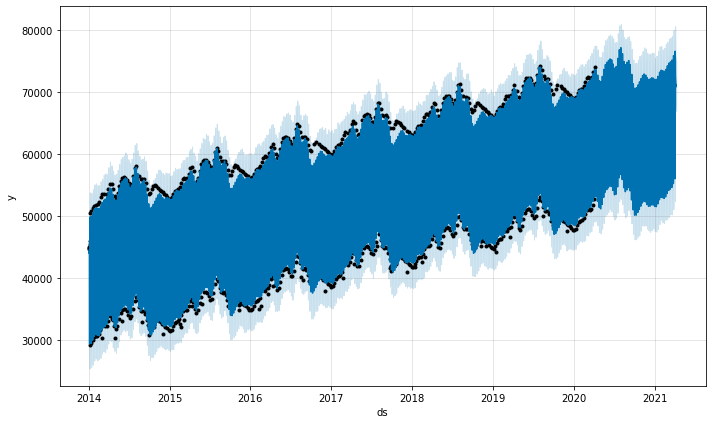

In [14]:
fig1 = m.plot(forecast)

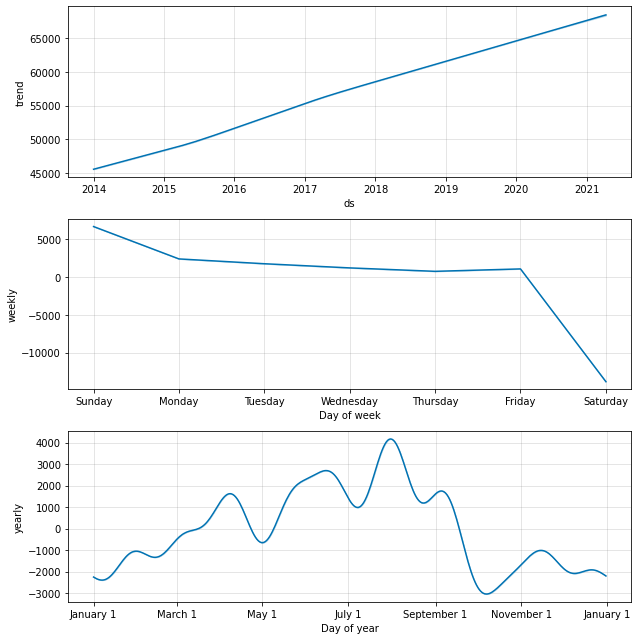

In [15]:
fig2 = m.plot_components(forecast)

## Model evaluation

In [ ]:
Discussions